In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
requester_status = ctrl.Antecedent(np.arange(0, 11, 1), 'requester_status')
sensitivity_PI = ctrl.Antecedent(np.arange(0, 11, 1), 'sensitivity_PI')
sensitivity_MI = ctrl.Antecedent(np.arange(0, 11, 1), 'sensitivity_MI')

access_granted = ctrl.Consequent(np.arange(0, 11, 1), 'access_granted')

In [3]:
requester_status.automf(3)
sensitivity_PI.automf(3)
sensitivity_MI.automf(3)

In [4]:
access_granted['no'] = fuzz.trimf(access_granted.universe, [0, 0, 6])
access_granted['maybe'] = fuzz.trimf(access_granted.universe, [0, 6, 11])
access_granted['yes'] = fuzz.trimf(access_granted.universe, [6, 11, 11])

/Users/pratikaher/py_36_env/lib/python3.6/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


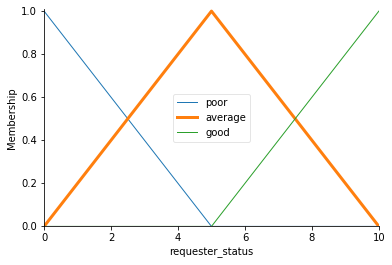

In [5]:
requester_status['average'].view()

In [6]:
rule1 = ctrl.Rule(requester_status['poor'] & sensitivity_PI['good'], access_granted['no'])

In [7]:
access_ctrl = ctrl.ControlSystem([rule1])

In [8]:
access = ctrl.ControlSystemSimulation(access_ctrl)

In [9]:
access.input['requester_status'] = 2.0
access.input['sensitivity_PI'] = 9.0

In [10]:
access.compute()

In [12]:
print(access.output['access_granted'])

2.228571428571428
